<a href="https://colab.research.google.com/github/yashyaks/compute_tasks/blob/main/Lab_5/Lab5.3_LogisticRegression_airplane.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/sample_data/train (1).csv')
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [ ]:
df['satisfaction'].value_counts()

neutral or dissatisfied    58879
satisfied                  45025
Name: satisfaction, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [ ]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103594 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103594 non-null  int64  
 1   id                                 103594 non-null  int64  
 2   Gender                             103594 non-null  object 
 3   Customer Type                      103594 non-null  object 
 4   Age                                103594 non-null  int64  
 5   Type of Travel                     103594 non-null  object 
 6   Class                              103594 non-null  object 
 7   Flight Distance                    103594 non-null  int64  
 8   Inflight wifi service              103594 non-null  int64  
 9   Departure/Arrival time convenient  103594 non-null  int64  
 10  Ease of Online booking             103594 non-null  int64  
 11  Gate location                      1035

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Gender']= label_encoder.fit_transform(df['Gender'])
df['Customer Type']= label_encoder.fit_transform(df['Customer Type'])
df['Type of Travel']= label_encoder.fit_transform(df['Type of Travel'])
df['Class']= label_encoder.fit_transform(df['Class'])
df['satisfaction']= label_encoder.fit_transform(df['satisfaction'])

In [ ]:
df['satisfaction'].value_counts()

0    58697
1    44897
Name: satisfaction, dtype: int64

In [ ]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,1,0,13,1,2,460,3,4,...,5,4,3,4,4,5,5,25,18.0,0
1,1,5047,1,1,25,0,0,235,3,2,...,1,1,5,3,1,4,1,1,6.0,0
2,2,110028,0,0,26,0,0,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,3,24026,0,0,25,0,0,562,2,5,...,2,2,5,3,1,4,2,11,9.0,0
4,4,119299,1,0,61,0,0,214,3,3,...,3,3,4,4,3,3,3,0,0.0,1


In [ ]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,1,0,13,1,2,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,0
1,5047,1,1,25,0,0,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,0
2,110028,0,0,26,0,0,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,24026,0,0,25,0,0,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,119299,1,0,61,0,0,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1


In [ ]:
X = df.drop("satisfaction",axis=1)
y = df["satisfaction"]

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=0)
lr.fit(X, y)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [ ]:
df_test = pd.read_csv('/content/sample_data/test (1).csv')

df_test['Gender']= label_encoder.fit_transform(df_test['Gender'])
df_test['Customer Type']= label_encoder.fit_transform(df_test['Customer Type'])
df_test['Type of Travel']= label_encoder.fit_transform(df_test['Type of Travel'])
df_test['Class']= label_encoder.fit_transform(df_test['Class'])
df_test['satisfaction']= label_encoder.fit_transform(df_test['satisfaction'])

df_test.dropna(inplace=True)
df_test.drop('Unnamed: 0',axis=1,inplace=True)

X_test = df_test.drop("satisfaction",axis=1)
y_test = df_test["satisfaction"]

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay,classification_report

In [ ]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.70      0.79      0.75     12943
           1       0.76      0.67      0.71     12950

    accuracy                           0.73     25893
   macro avg       0.73      0.73      0.73     25893
weighted avg       0.73      0.73      0.73     25893



In [ ]:
cm=confusion_matrix(y_test,y_pred,labels=lr.classes_)

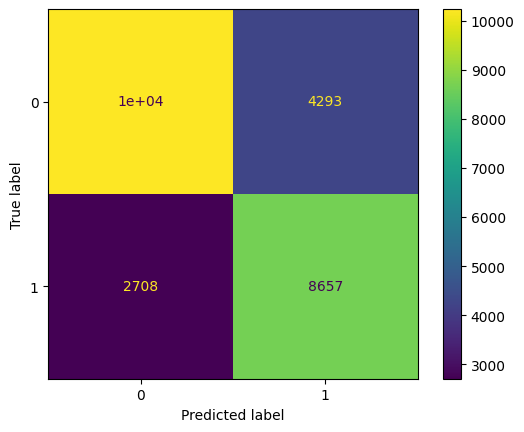

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=lr.classes_)
disp.plot()
plt.show()

# After Regularisation:-

L1 Regularisation

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty = 'l1',C = 0.1,solver='liblinear',random_state=0)
lr.fit(X, y)

LogisticRegression(C=0.1, penalty='l1', random_state=0, solver='liblinear')

In [ ]:
df_test = pd.read_csv('/content/sample_data/test (1).csv')

df_test['Gender']= label_encoder.fit_transform(df_test['Gender'])
df_test['Customer Type']= label_encoder.fit_transform(df_test['Customer Type'])
df_test['Type of Travel']= label_encoder.fit_transform(df_test['Type of Travel'])
df_test['Class']= label_encoder.fit_transform(df_test['Class'])
df_test['satisfaction']= label_encoder.fit_transform(df_test['satisfaction'])

df_test.dropna(inplace=True)
df_test.drop('Unnamed: 0',axis=1,inplace=True)

X_test = df_test.drop("satisfaction",axis=1)
y_test = df_test["satisfaction"]

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay,classification_report

In [ ]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89     14931
           1       0.84      0.87      0.85     10962

    accuracy                           0.87     25893
   macro avg       0.87      0.87      0.87     25893
weighted avg       0.87      0.87      0.87     25893



In [ ]:
cm=confusion_matrix(y_test,y_pred,labels=lr.classes_)

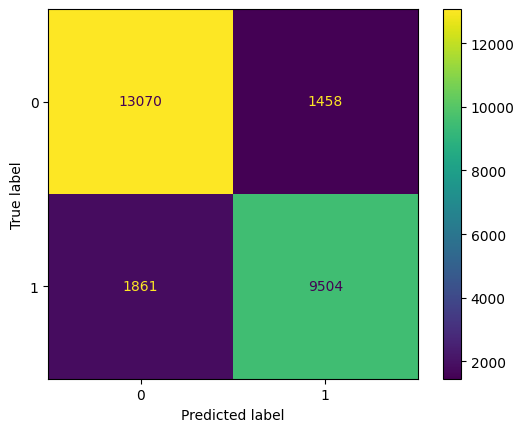

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=lr.classes_)
disp.plot()
plt.show()

L2 Regularisation

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty = 'l2',random_state=0)
lr.fit(X, y)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [ ]:
df_test = pd.read_csv('/content/sample_data/test (1).csv')

df_test['Gender']= label_encoder.fit_transform(df_test['Gender'])
df_test['Customer Type']= label_encoder.fit_transform(df_test['Customer Type'])
df_test['Type of Travel']= label_encoder.fit_transform(df_test['Type of Travel'])
df_test['Class']= label_encoder.fit_transform(df_test['Class'])
df_test['satisfaction']= label_encoder.fit_transform(df_test['satisfaction'])

df_test.dropna(inplace=True)
df_test.drop('Unnamed: 0',axis=1,inplace=True)

X_test = df_test.drop("satisfaction",axis=1)
y_test = df_test["satisfaction"]

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay,classification_report

In [ ]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.70      0.79      0.75     12943
           1       0.76      0.67      0.71     12950

    accuracy                           0.73     25893
   macro avg       0.73      0.73      0.73     25893
weighted avg       0.73      0.73      0.73     25893



In [ ]:
cm=confusion_matrix(y_test,y_pred,labels=lr.classes_)

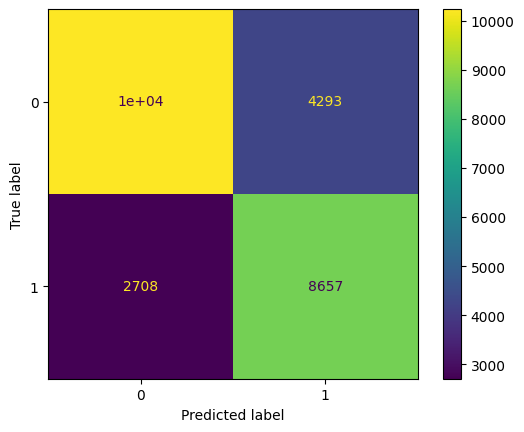

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=lr.classes_)
disp.plot()
plt.show()